In [1]:
import pandas as pd

In [2]:
df_booking = pd.read_csv("../Data-Analysis-Project/datasets/fact_bookings.csv")
print(df_booking.head())

         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2  May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3  May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   
4  May012216558RT15        16558     27-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   
4        4.0           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue_realized  
0              10010             

DATA Exploration

In [3]:
df_booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [4]:
df_booking['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_booking['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<Axes: xlabel='booking_platform'>

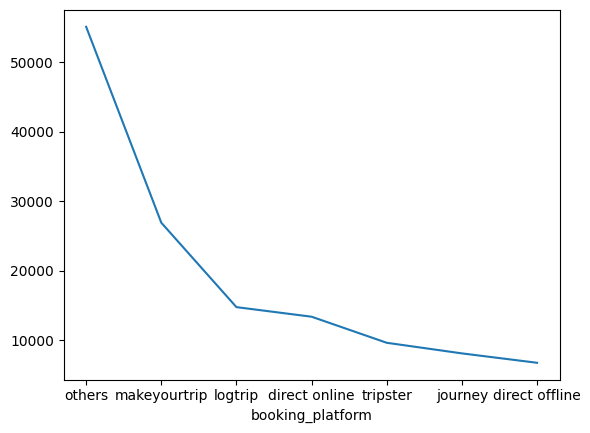

In [7]:
df_booking['booking_platform'].value_counts().plot()

In [5]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [8]:
df_date = pd.read_csv("../Data-Analysis-Project/datasets/dim_date.csv")
df_hotels = pd.read_csv("../Data-Analysis-Project/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("../Data-Analysis-Project/datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("../Data-Analysis-Project/datasets/fact_aggregated_bookings.csv")

In [10]:
df_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [11]:
df_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

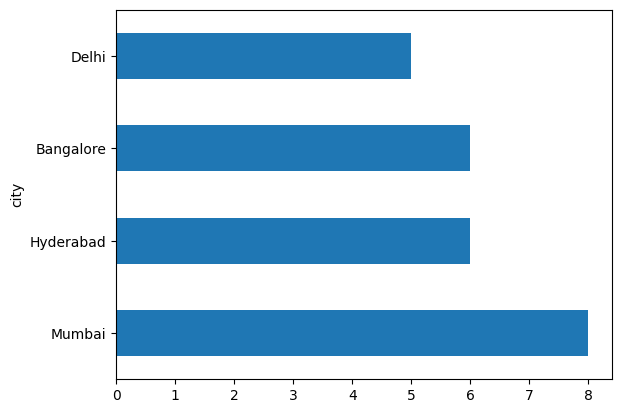

In [15]:
df_hotels['city'].value_counts().plot(kind='barh')

Data Cleaning

In [16]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [20]:
df_booking.shape

(134590, 12)

In [24]:
df_booking = df_booking[df_booking['no_guests'] > 0]

In [23]:
df_booking.shape

(134578, 12)

In [28]:
mins,maxs = df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max()
(mins,maxs)

(6500, 28560000)

IQR, STD or remove outliers

In [29]:
avg , sdt = df_booking['revenue_generated'].mean(),df_booking['revenue_generated'].std()
(avg , sdt)

(15378.036937686695, 93040.1549314641)

In [30]:
heigher_limt = avg+ 3 * sdt
heigher_limt

294498.50173207896

In [31]:
lower_limit = avg - 3 * sdt
lower_limit

-263742.4278567056

In [32]:
df_booking[df_booking['revenue_generated']> heigher_limt]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [33]:
df_booking = df_booking[df_booking['revenue_generated'] < heigher_limt]

In [34]:
df_booking['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [48]:
df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [49]:
heigher_limt_re = df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].mean() + df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].std() * 3
heigher_limt_re

50585.10567100048

In [51]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Data Transformation

In [52]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [53]:
df_agg_bookings["occ_pct"] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [54]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [55]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))

In [56]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
